### Importing the libraries

In [59]:
import pandas as pd 
import numpy as np               
import seaborn as sns                
import matplotlib.pyplot as plt   
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")  
# plt.figure(dpi=600)
# %matplotlib inline

### Loading the dataset 

In [61]:
train=pd.read_csv('train.csv')

test=pd.read_csv('test.csv')

In [62]:
train.shape, test.shape

((614, 13), (367, 12))

In [63]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
pd.DataFrame(train.dtypes)

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


### Exploratory Data Analysis
###  Univariate Analysis

#### Loan Status

In [65]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot: >

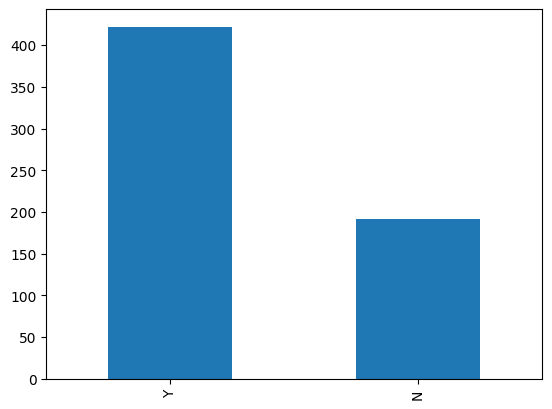

In [66]:
train['Loan_Status'].value_counts().plot.bar()

#### Categorical Variables

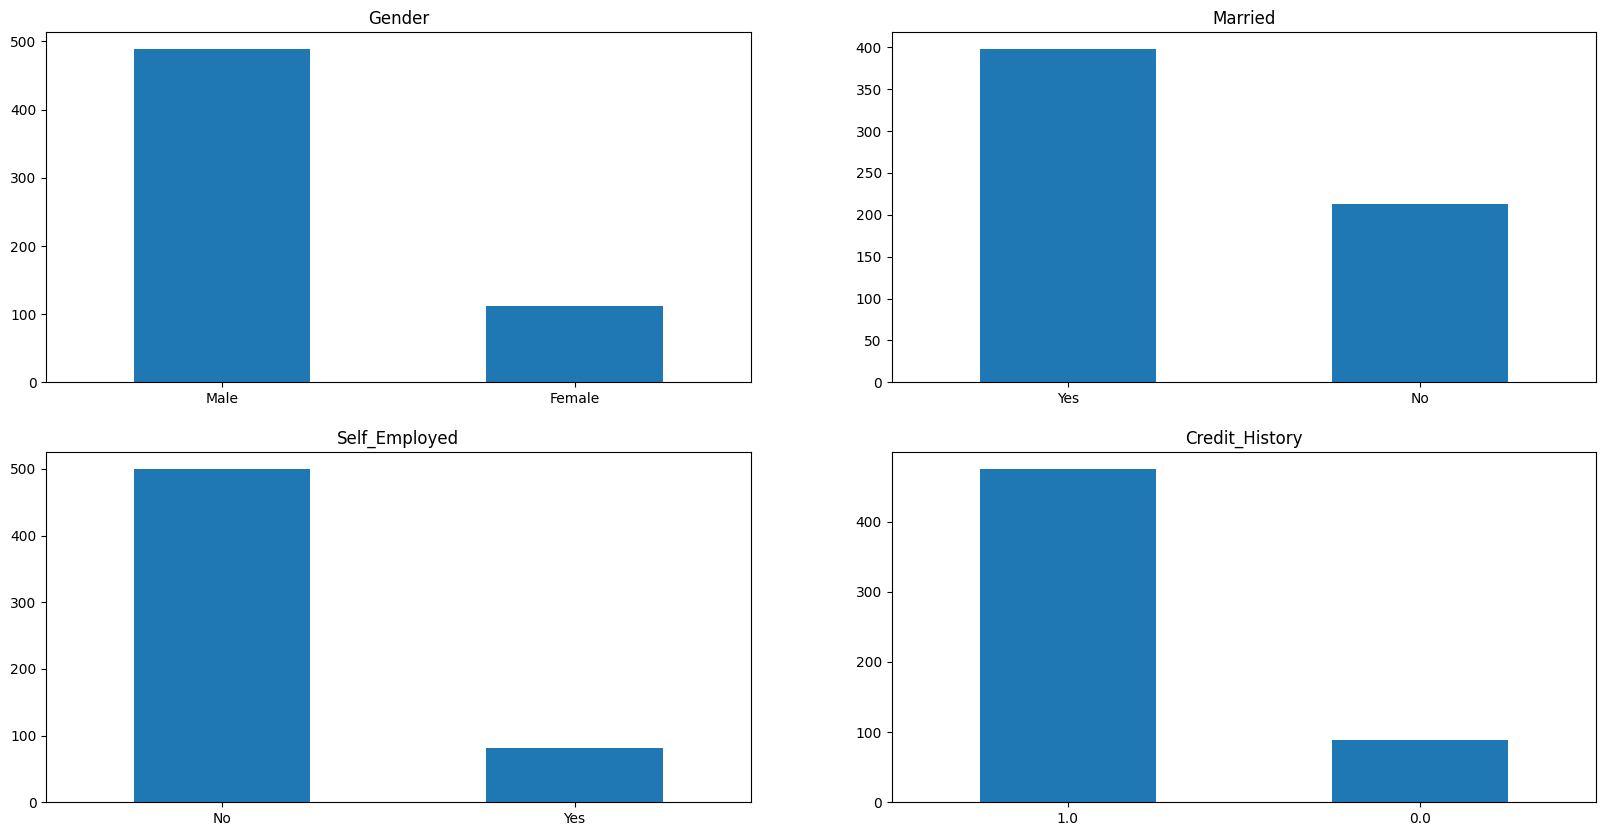

In [67]:
plt.figure() 

plt.subplot(2,2,1) 
train['Gender'].value_counts().plot.bar(figsize=(20,10), title= 'Gender')
plt.xticks(rotation='horizontal')

plt.subplot(2,2,2) 
train['Married'].value_counts().plot.bar(title= 'Married') 
plt.xticks(rotation='horizontal')

plt.subplot(2,2,3) 
train['Self_Employed'].value_counts().plot.bar(title= 'Self_Employed') 
plt.xticks(rotation='horizontal')

plt.subplot(2,2,4) 
train['Credit_History'].value_counts().plot.bar(title= 'Credit_History') 
plt.xticks(rotation='horizontal')

plt.show()

It can be inferred from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

#### Ordinal Values

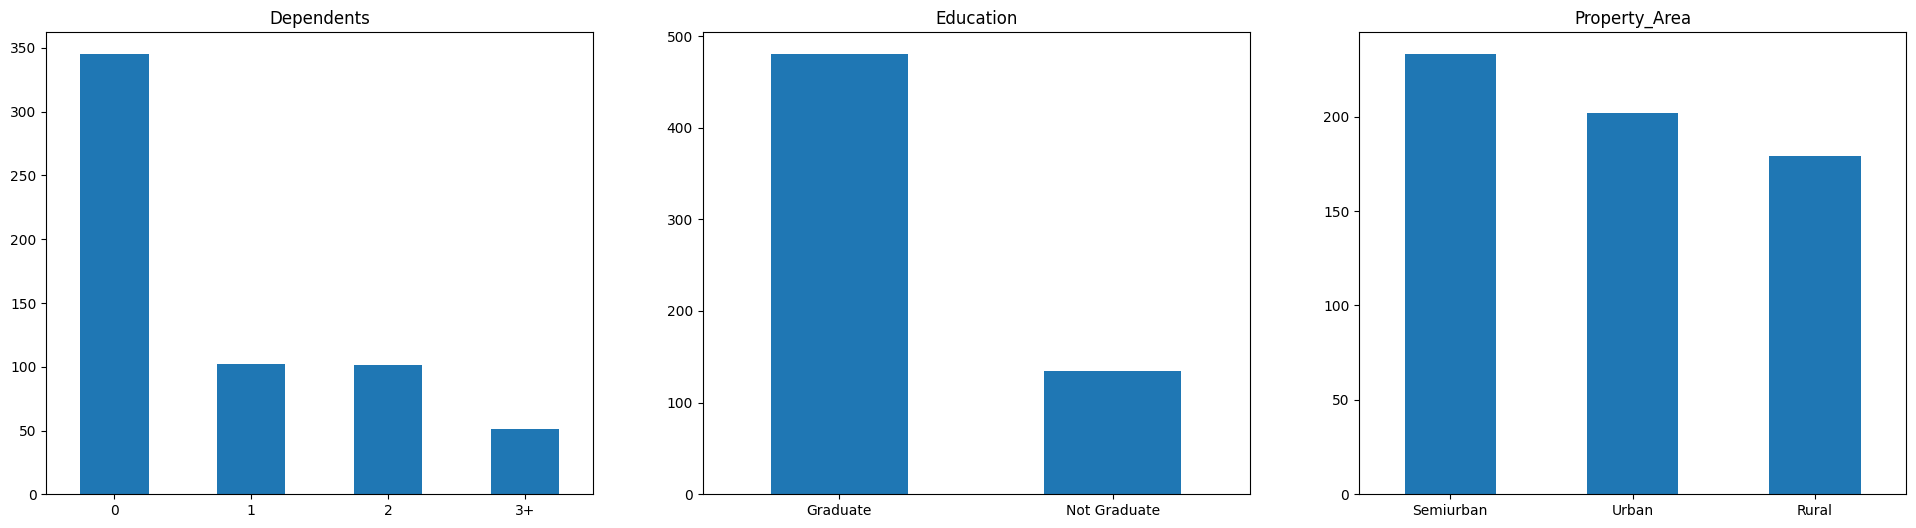

In [68]:
plt.figure() 

plt.subplot(1, 3, 1) 
train['Dependents'].value_counts().plot.bar(figsize=(24,6), title= 'Dependents')
plt.xticks(rotation='horizontal')

plt.subplot(1, 3, 2)
train['Education'].value_counts().plot.bar(title= 'Education') 
plt.xticks(rotation='horizontal')

plt.subplot(1, 3, 3)
train['Property_Area'].value_counts().plot.bar(title= 'Property_Area') 
plt.xticks(rotation='horizontal')

plt.show()

Following inferences can be made from the above bar plots:

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.

#### Numerical Variable 

#### Applicant Income

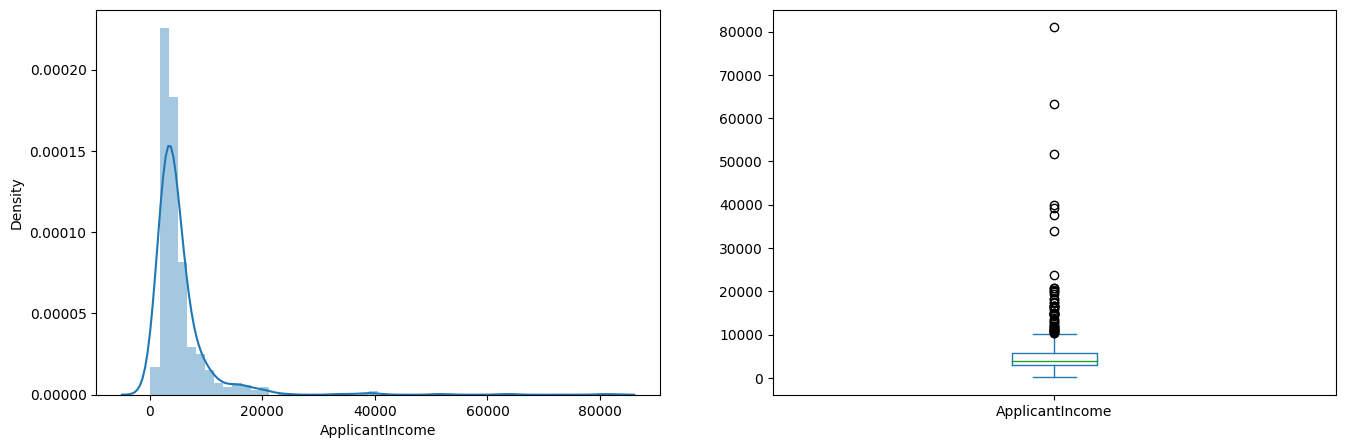

In [69]:
plt.figure() 

plt.subplot(1,2,1) 
sns.distplot(train['ApplicantIncome']); 

plt.subplot(1,2,2) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.xticks(rotation='horizontal')

plt.show()

- It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed
- The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

#### Applicant Income by Education

Text(0.5, 0.98, '')

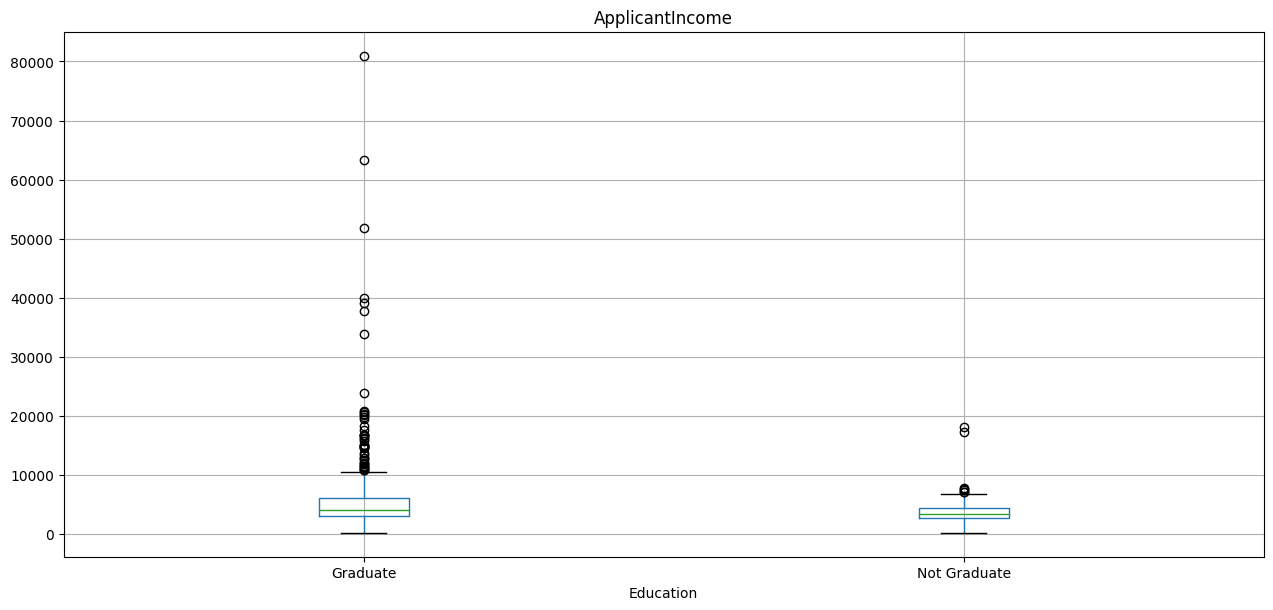

In [70]:
train.boxplot(column='ApplicantIncome', by = 'Education', figsize=(15, 7)) 
plt.suptitle('')

- We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

#### Coapplicant Income

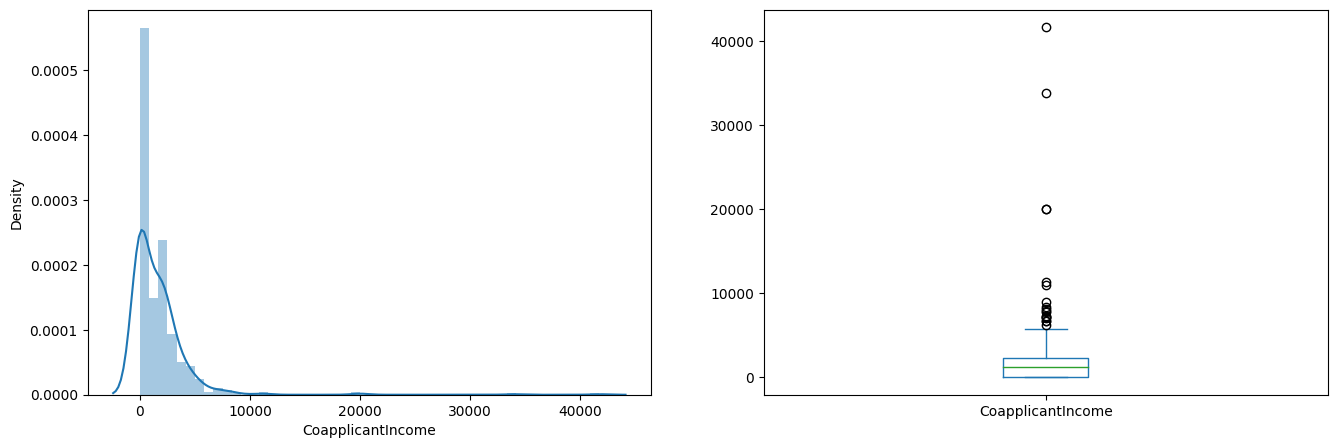

In [71]:
plt.figure()

plt.subplot(1,2,1) 
sns.distplot(train['CoapplicantIncome'])

plt.subplot(1,2,2) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

plt.show()

- Similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

#### Loan Amount

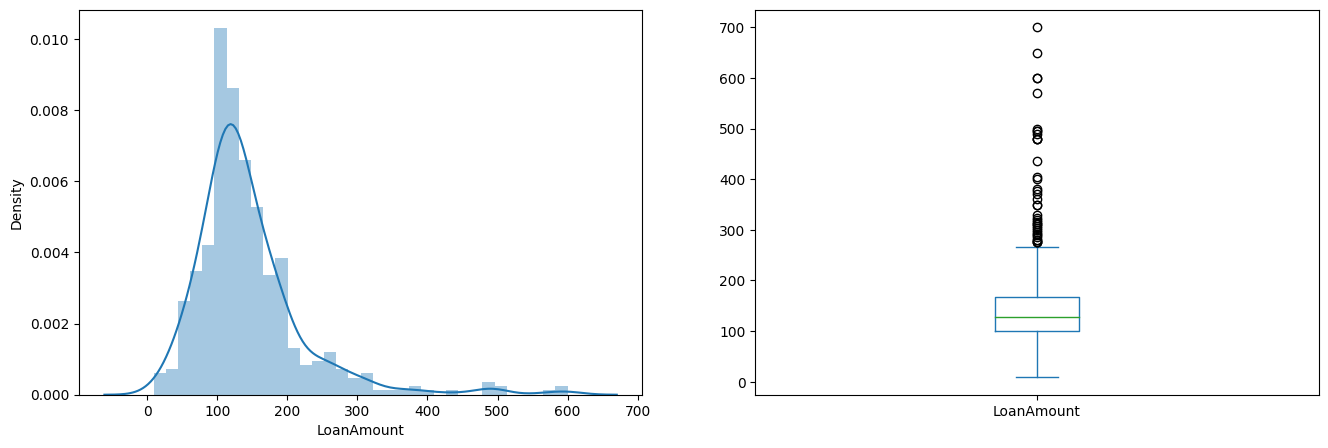

In [72]:
plt.figure() 

plt.subplot(1,2,1) 
df=train.dropna() 
sns.distplot(df['LoanAmount']);

plt.subplot(1,2,2) 
train['LoanAmount'].plot.box(figsize=(16,5)) 

plt.show()

- We see a lot of outliers in this variable and the distribution is fairly normal.

#### Total Income (Applicant + Coapplicant)

<AxesSubplot: >

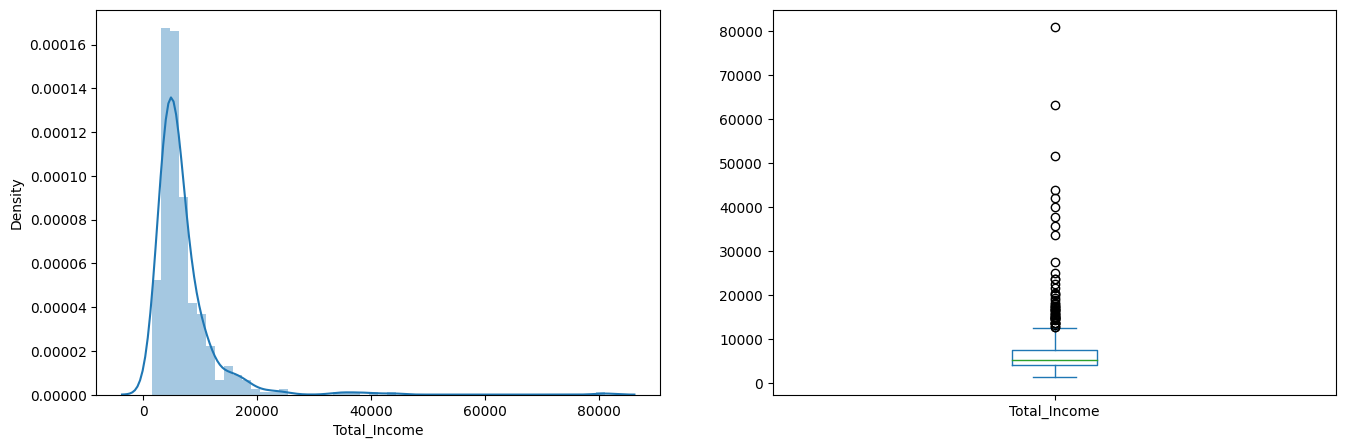

In [73]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

plt.subplot(1,2,1) 
df=train.dropna() 
sns.distplot(df['Total_Income'])

plt.subplot(1,2,2) 
train['Total_Income'].plot.box(figsize=(16,5)) 

### Bivariate Analysis

#### Categorical Independent Variables Vs Target Variable 

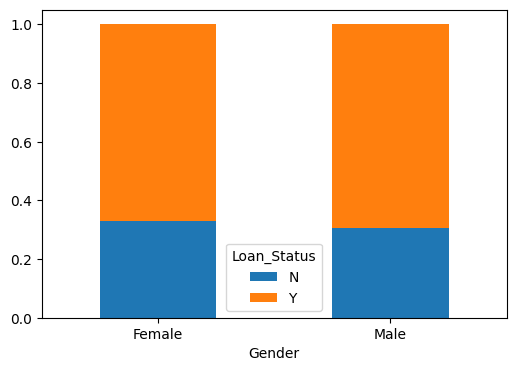

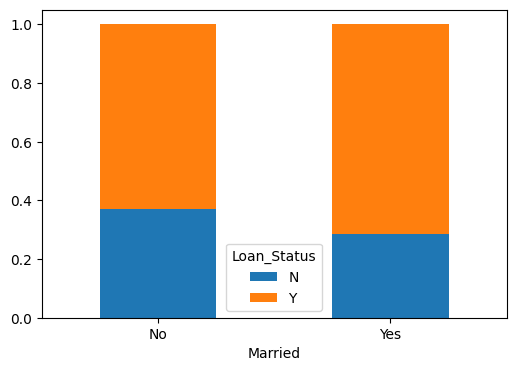

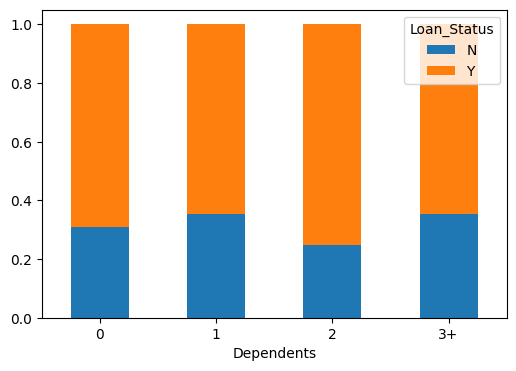

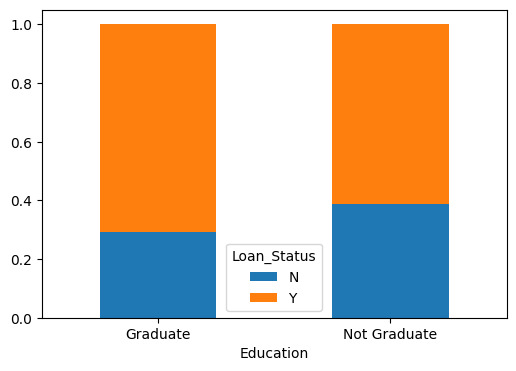

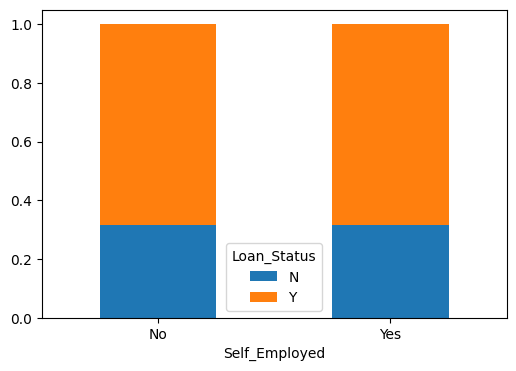

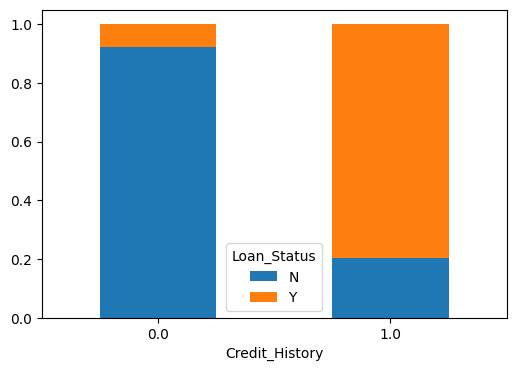

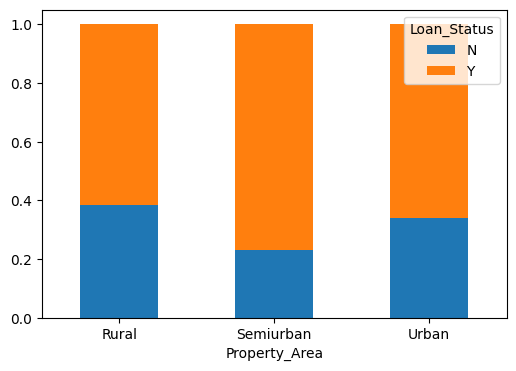

In [74]:
column_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

for column in column_names:
    cross_tab = pd.crosstab(train[column],train['Loan_Status'])
    cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4)) 
    plt.xticks(rotation='horizontal')
    plt.show()

- It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.
- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

#### Numerical Independent Variable vs Target Variable
- mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot: xlabel='Loan_Status'>

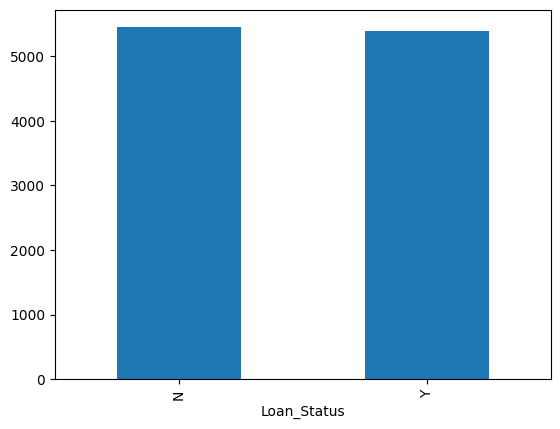

In [75]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

- Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. 
- Making bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

#### Applicant Income 

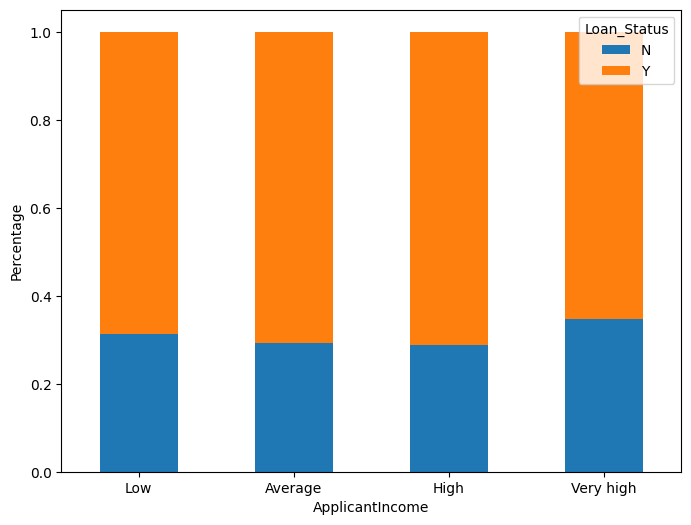

In [76]:
bins = [0,2500,4000,6000,81000] 
group = ['Low','Average','High', 'Very high'] 

train['Applicant_Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Applicant_Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,6))

plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.show()

- It can be inferred that Applicant income does not affect the chances of loan approval

#### Coapplicant Income

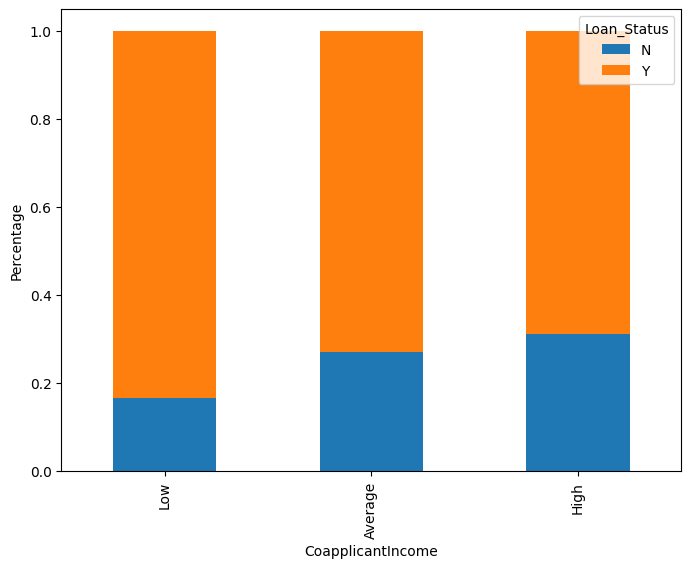

In [77]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,6)) 

plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')
plt.show()

- It shows that if coapplicant’s income is less the chances of loan approval are high. 
- But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 
- So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

#### Total Income

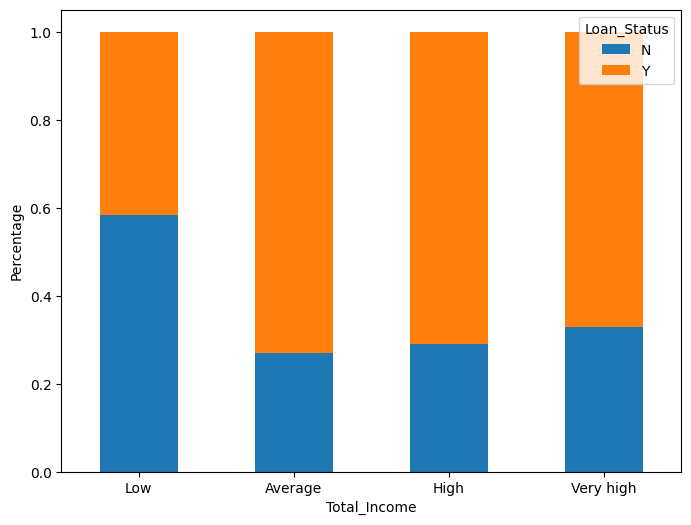

In [78]:
bins = [0,2500,4000,6000,81000] 
group = ['Low','Average','High', 'Very high'] 

train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,6)) 

plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')

plt.show()

- We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

#### Loan Amount

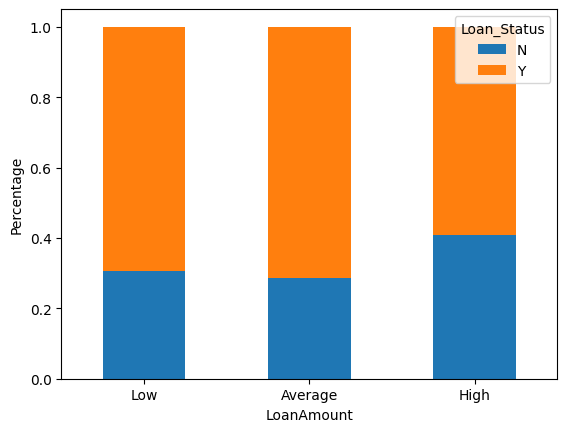

In [79]:
bins = [0,100,200,700] 
group = ['Low','Average','High'] 

train['LoanAmount_bin'] = pd.cut(df['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.xticks(rotation='horizontal')
plt.show()

- It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount
- The chances of loan approval will be high when the loan amount is less.

### Data Preprocessing

In [80]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Applicant_Income_bin,Coapplicant_Income_bin,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN,NaN,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,High,Average,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average,NaN,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,Average,Average,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High,NaN,High,Average


- #### We will change the 3+ in dependents variable to 3 to make it a numerical variable.

In [81]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

- #### Convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.

In [82]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

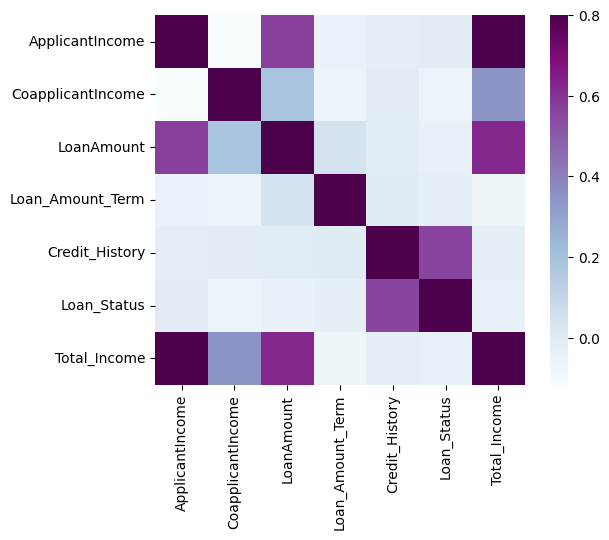

In [83]:
corr = train.corr() 
# f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(corr, vmax=.8, square=True, cmap="BuPu");

In [84]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Applicant_Income_bin', 'Coapplicant_Income_bin',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

- #### Missing Values

In [85]:
pd.DataFrame(train.isnull().sum())

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [86]:
pd.DataFrame(test.isnull().sum())

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [87]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### Fill categorical variables using Mode

In [88]:
column_names = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

for column in column_names:
    train[column].fillna(train[column].mode()[0], inplace=True)
    test[column].fillna(test[column].mode()[0], inplace=True)

#### Fill categorical variables using Mode

- Loan Amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [89]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [90]:
train.isnull().any()

Loan_ID                   False
Gender                    False
Married                   False
Dependents                False
Education                 False
Self_Employed             False
ApplicantIncome           False
CoapplicantIncome         False
LoanAmount                False
Loan_Amount_Term          False
Credit_History            False
Property_Area             False
Loan_Status               False
Total_Income              False
Applicant_Income_bin       True
Coapplicant_Income_bin     True
Total_Income_bin          False
LoanAmount_bin             True
dtype: bool

- #### Outliers Handling
    - Due to outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. 
    - One way to remove the skewness is by doing the log transformation. We take the log transformation, it does not affect the smaller values much, but reduces the larger values.
    - So, we get a distribution similar to normal distribution.

<AxesSubplot: >

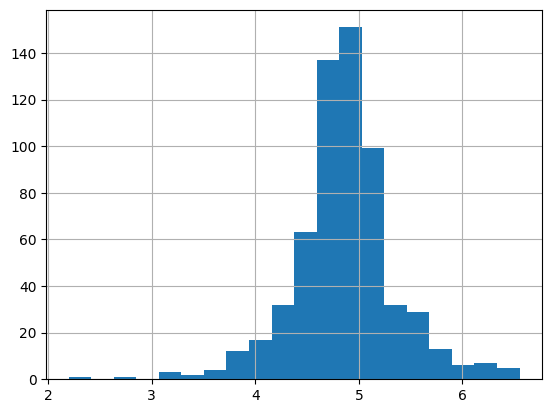

In [91]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

train['LoanAmount_log'].hist(bins=20) 

- Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

<AxesSubplot: >

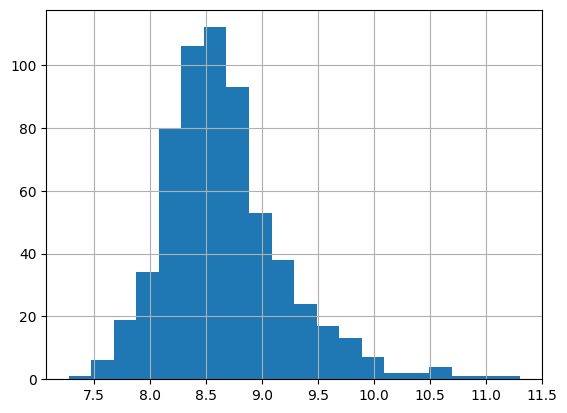

In [92]:
train['Total_Income_log'] = np.log(train['Total_Income'])
train['Total_Income_log'].hist(bins=20) 

In [93]:
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']
test['Total_Income_log'] = np.log(test['Total_Income'])

In [94]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Applicant_Income_bin,Coapplicant_Income_bin,Total_Income_bin,LoanAmount_bin,LoanAmount_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,NaN,NaN,High,NaN,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,High,Average,Very high,Average,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Average,NaN,Average,Low,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,Average,Average,High,Average,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,High,NaN,High,Average,4.948760,8.699515


In [95]:
# Removing Bins
train.drop(['Applicant_Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'LoanAmount_bin'], axis=1, inplace=True)

# Removing Orignal columns because they are processed into new columns
train.drop(['ApplicantIncome', 'CoapplicantIncome'] , axis=1, inplace=True)
test.drop(['ApplicantIncome', 'CoapplicantIncome'] , axis=1, inplace=True)

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,1,5849.0,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0,4.948760,8.699515


In [96]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


- #### Removing Loan_ID column

In [97]:
train = train.drop('Loan_ID',axis=1) 

test = test.drop('Loan_ID',axis=1)

### Create CSV files for training and testing

In [98]:
train.to_csv('final_train.csv', index=False)

test.to_csv('final_test.csv', index=False)